In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils_np import *
from visualization import *

# Rotation in the inertial frame

Let $\omega \in \R^3$ be the angular velocity and let $R \in SO(3)$ be the orientation of a body $R$ seen from the inertial frame. Then

$$
\dot R = RS(\omega)
$$

where 

$$
S(\omega) = \begin{bmatrix}
0 &  \omega_3 & -\omega_2\\
-\omega_3 & 0 & \omega_1\\
\omega_2 & - \omega_1 & 0
\end{bmatrix}
$$ 

and 

$$
SO(3) := \{R \in \R^{3 \times 3} \; | \; RR^T = I, \; \text{det}(R) = 1 \}.
$$


# Dynamics

Newtons second law ($\dot L = u$), that the time derivative of angular momentum is equal to external forces, gives us

$$
S(\omega)\mathcal I \omega + \mathcal I \dot \omega = u
$$

# Hamiltonian system

Since the kinetic energy is given by $T = \omega^T\mathcal I \omega$, we get the Lagrangian on the form

$$
\mathcal L = T + U =\frac{1}{2} \omega^T\mathcal I \omega 
$$

The Legendre transformation allows us to find the Hamiltonian (in the "classical" notation $\dot q = \omega$).

$$
\begin{align}
p &= \frac{d \mathcal L}{d\omega} = \mathcal I \omega\\
\implies \omega &= \mathcal I^{-1}p\\ \\
H(q,p) &= p^T\dot q - \mathcal L(q,\dot q) \\
&= p^T \omega - \frac{1}{2} \omega^T\mathcal I \omega  \\
&= p^T\mathcal I^{-1}p - \frac{1}{2}p^T\mathcal I^{-T}\mathcal I \mathcal I^{-1}p\\
&= \frac{1}{2}p^T\mathcal I^{-1}p 
\end{align}
$$

We can now write the Kinetics equation by

$$
\dot p = S(p)\nabla_p H(p) + u
$$

Consider now the kinematic equation. Let $r_i$ be row $i$ of $R$. Then $\dot R = RS(\omega)$ is equivalent to

$$
r_i = r_i \times \omega = S(r_i)\omega.
$$

Defining $q = [r_1^T,r_2^T,r_3^T]^T \in \R^9$ and $S(q) := [S(r_1),S(r_2),S(r_3)]^T \in \R^{9 \times 3}$, we can rewrite the kinematics as 

$$
\dot q = S(q)\omega
$$

Since $\nabla_p H(p) = \mathcal I^{-1}\omega = \omega$ we can write the kinematics and kinetics as the port-Hamiltonian system

$$
\begin{bmatrix}
\dot q\\
\dot p
\end{bmatrix}
=
\begin{bmatrix}
0 & S(q)\\
-S(q) & S(p)
\end{bmatrix}
\begin{bmatrix}
\nabla_q H(q,p) \\
\nabla_p H(q,p)
\end{bmatrix}
+
\begin{bmatrix}
0 \\
I
\end{bmatrix}
u
$$


# Control by energy shaping (ES) and damping injection (DI)

This follows chapter 3 of Forni, Jeltsema & Lopes.

Energy balancing by setting

$$
H_d(q,p) = H(q,p) + H_{\text{ref}}(q,p)
$$

such that if we want to drive the system to ($q^*,p^*)$ we have 

$$
\text{argmin}_{q,p} H_{\text{d}}(q,p) = (q^*,p^*)
$$

This is achieved by setting, for $K_p = \text{diag}\{k_1,k_2,k_3\}$

$$
H_{\text{ref}}(q) := \frac{1}{2}\text{tr}[K_p(I - R_{\text{ref}}^TR)]
$$

**Why does this work? Need to verify this.**

Then we let
$$
\begin{align}
u_{\text{es}} := -S(q)^T \nabla_q H_{\text{ref}}(q) &= \frac{1}{2} \sum_{i=1}^3 S(r_i)^TK_p r_{\text{ref},i} \\
 &= -\frac{1}{2} \sum_{i=1}^3 S(r_i) K_p r_{\text{ref},i} \\
 &=  -\frac{1}{2} \sum_{i=1}^3 r_i \times K_p r_{\text{ref},i} \\
 &= -\frac{1}{2} \sum_{i=1}^3 [ K_p r_{\text{ref},i} r_i^T - r_ir_{\text{ref},i}^TK_p^T ]^{\vee} \\
 &= -\frac{1}{2} ( K_p R_{\text{ref}}^TR - R^TR_{\text{ref}}K_p^T )^{\vee} 
\end{align}
$$

Where $\cdot^{\vee}$ is the inverse of $S(\cdot)$, mapping a skew symmetric matrix to a vector.

We add damping by setting, for $K_d = \text{diag}\{k_1,k_2,k_3\}$

$$
u_{\text{di}} = -K_d y = -K_d \nabla_p H(q,p) = -K_d \omega
$$

This means we get

$$
\begin{align}
\begin{bmatrix}
\dot q\\
\dot p
\end{bmatrix}
&=
\begin{bmatrix}
0 & S(q)\\
-S(q)^T & S(p)
\end{bmatrix}
\begin{bmatrix}
\nabla_q H(q,p) \\
\nabla_p H(q,p)
\end{bmatrix}
+
\begin{bmatrix}
0 \\
I
\end{bmatrix}
(u_{\text{es}} + u_{\text{di}})\\
&= \begin{bmatrix}
0 & S(q)\\
-S(q)^T & S(p)
\end{bmatrix}
\begin{bmatrix}
\nabla_q H(q,p) \\
\nabla_p H(q,p)
\end{bmatrix}
+
\begin{bmatrix}
0 \\
I
\end{bmatrix}
\bigg(-S(q)^T \nabla_q H_{\text{ref}}(q) - K_d \nabla_p H(q,p)\bigg)\\
&= 
\begin{bmatrix}
0 & S(q)\\
-S(q)^T & S(p) - K_p
\end{bmatrix}
\begin{bmatrix}
\nabla_q (H(q,p) + H_{\text{ref}}(q,p)) \\
\nabla_p H(q,p)
\end{bmatrix}
\end{align}
$$

# Solving IVPs for a rigid body

We first set initial values and the moments of inertia.



In [2]:
#Initial values
R0 = get_orth(3)
w0 = np.array([-0.1,0.1,0.3])


#Step size and number of steps
dt = 0.01
N = 50_000

#Moments of inertia and inverse
diag_I = np.array([1,0.8,0.1])
I = np.diag(diag_I)
I_inv = np.diag(1/diag_I)

#Defining the time derivatives
w_dot = lambda w : I_inv@hat(I@w)@w 
R_dot = lambda w : hat(w)


Time stepping with explicit euler for $\omega$ and Lie euler using the Rodrigues formula for the orientation $R$.

In [700]:
Rs = [R0]
Rs_e = [R0]
ws = [w0]

for n in range(N):
    R0 = Rs[-1]
    w0 = ws[-1]
    
    #Lie Euler
    R1 = R0@rodrigues(dt*R_dot(w0))
    #Explicit Euler
    w1 = w0 + dt*w_dot(w0)

    Rs.append(R1)
    ws.append(w1)

Rs = np.stack(Rs)
ws = np.stack(ws)



Plotting row $i$, $r_i \in S^2$ of $R$ trough time.

Text(0.5, 0.92, '$r_2$')

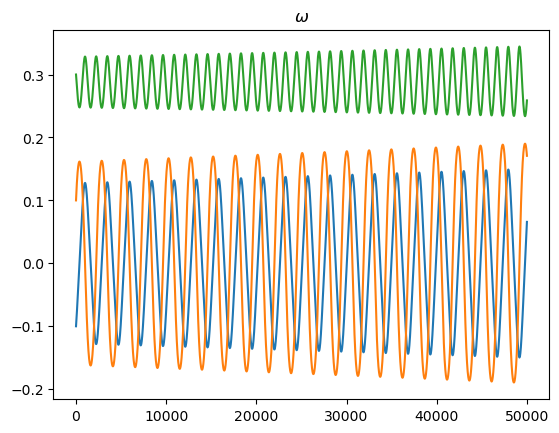

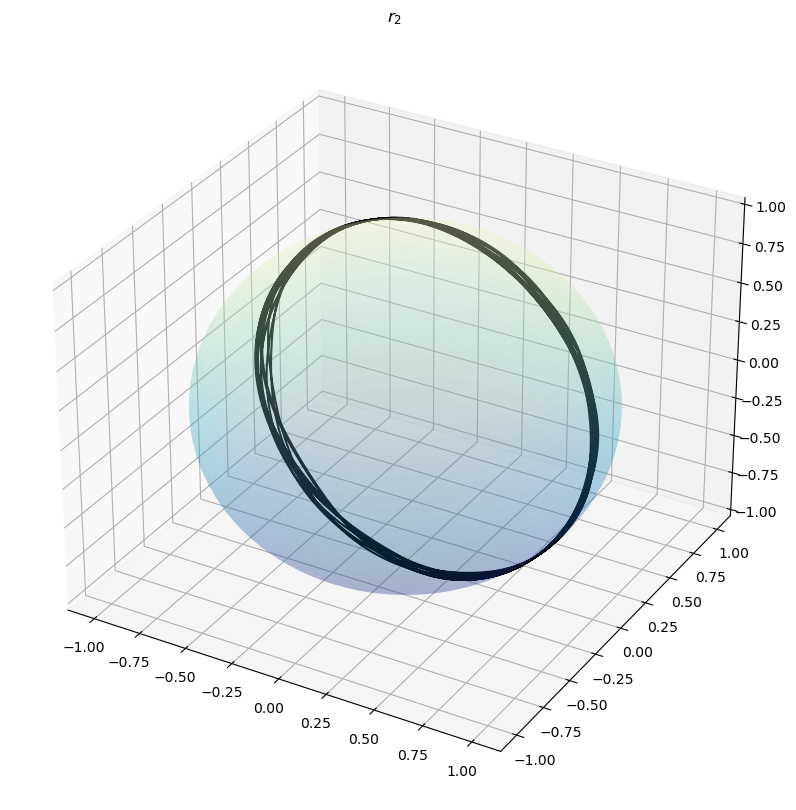

In [701]:
plt.plot(ws)
plt.title(r"$\omega$")

ax = get_sphere()

i = 2
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-')
plt.title(f"$r_{i}$")


# Applying ES & DI control for a rigid body

Setting initial values and the target orientation ```Rref``` as well as gains ```Kp,Kd``` for the control problem.

In [3]:
#Initial values
R0 = get_orth(3,seed=10)
R00 = R0
w0 = np.array([-0.1,0.8,0.9])

#Step size and number of steps
dt = 0.1
N = 1000


#Controller gains and desired orientation
Kp = np.diag([1]*3)
Kd = Kp
Rref = get_orth(3,seed=4)

#Moments of intertia and inverse 
diag_I = np.array([1,0.8,1.7])
I = np.diag(diag_I)
I_inv = np.diag(1/diag_I)

#Defining the energy shaping and damping injection controls
u_es = lambda R: -0.5*hat_inv(Kp@Rref.T@R - R.T@Rref@Kp.T)
u_di = lambda w: -Kd@w

#Time derivatives with controls
w_dot_es_di = lambda w,R : I_inv@(hat(I@w)@w + u_es(R) + u_di(w) )
R_dot = lambda w : hat(w) 

#Rotational energy and injected control energy (for plotting)
hamiltonian_rot = lambda w : 0.5*I@w.T@I_inv@I@w
hamiltonian_ref = lambda R : .5*np.trace(Kp@(np.eye(3) - Rref.T@R))
yTu_mid = lambda R,w0,w1 :  .5*(w0+w1).T@(u_es(R) + u_di(.5*(w0+w1)))
hamiltonian_diss = lambda w : w.T@Kd@w

hamiltonian_tot = lambda R,w : hamiltonian_rot(w)# + hamiltonian_ref(R)

def fixed_point_iter(x0,dt,f_method):
    w0,_ = x0
    w1 = w0
    x1 = (w1,None)
    while np.linalg.norm(w1 - (w0 + dt*f_method(x0,x1))) > 1e-15:
        w1 = w0 + dt*f_method(x0,x1)
        x1 = (w1,None)
    return w1

def midpoint(x0,dt,f):
    
    def f_method(x0,x1):
        w0,R0 = x0
        w1,_ = x1
        return f(.5*(w0+w1),R0)
    
    return fixed_point_iter(x0,dt,f_method)

def explicit_euler(x0,dt,f):
    w0,R0 = x0
    return w0 + dt*f(w0,R0)

def lie_euler(x0,dt,f):
    w0,R0 = x0
    return R0@rodrigues(dt*f(w0))

def integrate_rigid_body(w0,R0,dt,N,f_w,f_R,phi_w,phi_R):
    """ 
    w0:     initial value angular velocity (R^3)
    R0:     initial value orientation (SO(3))
    dt:     step size in time
    N:      number of time steps
    f_w:    vector field for anngular velocity
    f_R:    vector field for orientation
    phi_w:  integrator for angular velocity
    phi_R:  integrator for orientation
    """
    Rs = [R0]
    ws = [w0]

    for n in range(N):
        R0 = Rs[-1]
        w0 = ws[-1]
        x0 = (w0,R0)
        ws.append(phi_w(x0,dt,f=f_w))
        Rs.append(phi_R(x0,dt,f=f_R))

    Rs = np.stack(Rs)
    ws = np.stack(ws)

    return ws,Rs


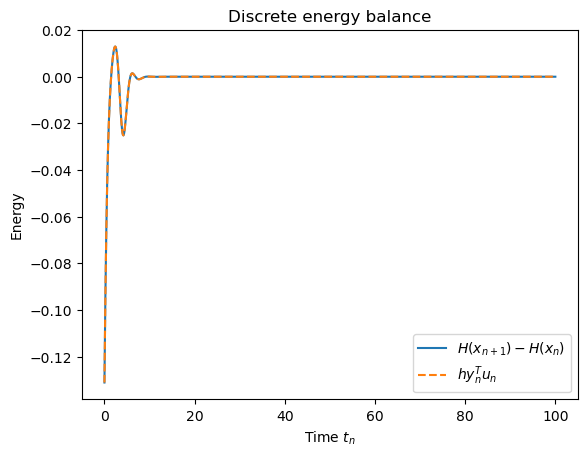

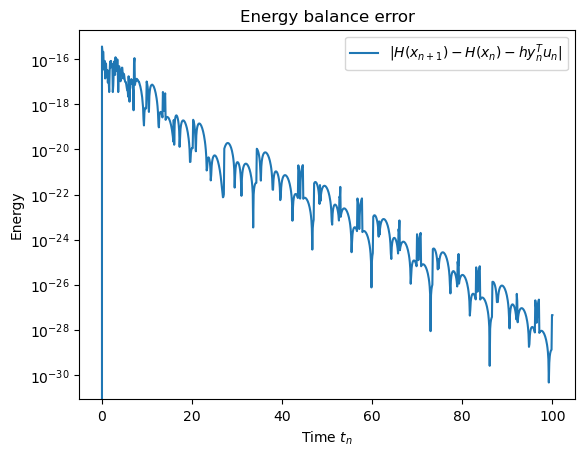

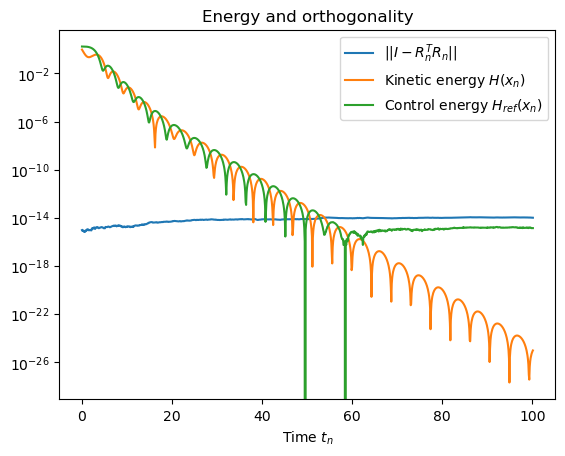

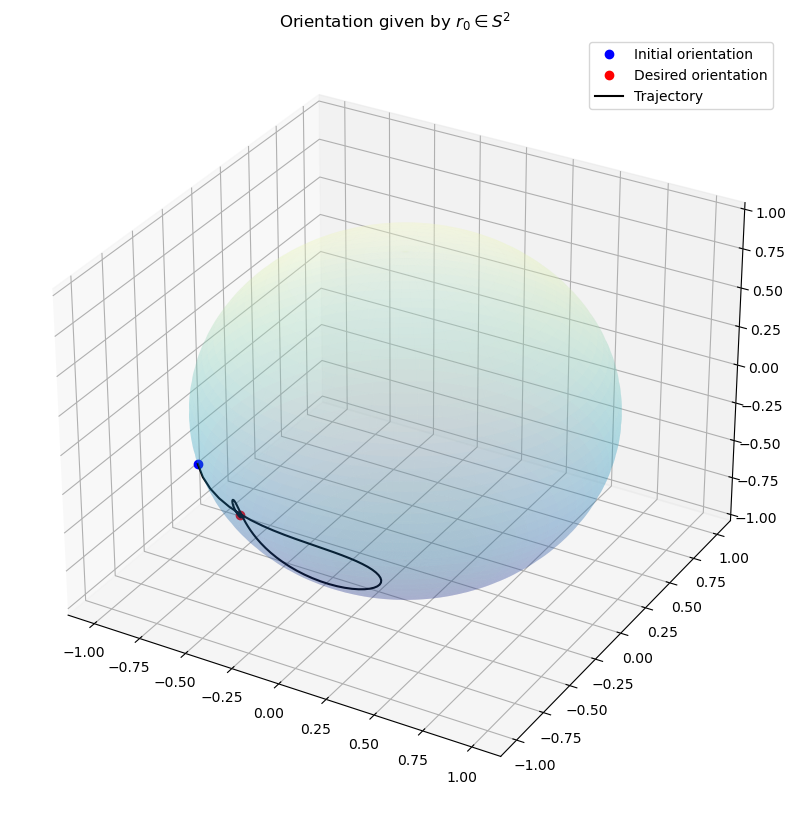

In [4]:
ws,Rs = integrate_rigid_body(w0,R0,dt,N,f_w=w_dot_es_di,f_R=R_dot,phi_w=midpoint,phi_R=lie_euler)
plot_discrete_energy_balance(hamiltonian_rot,yTu_mid,dt,ws,Rs)
plot_energy_orth(hamiltonian_rot,hamiltonian_ref,dt,ws,Rs)
plot_trajectory_S2(R0,Rref,Rs,i=0)

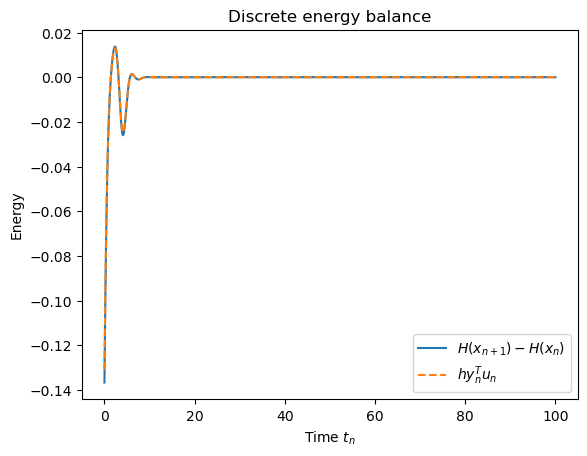

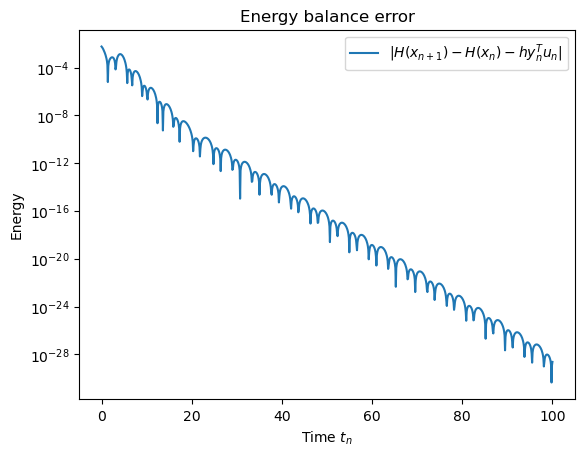

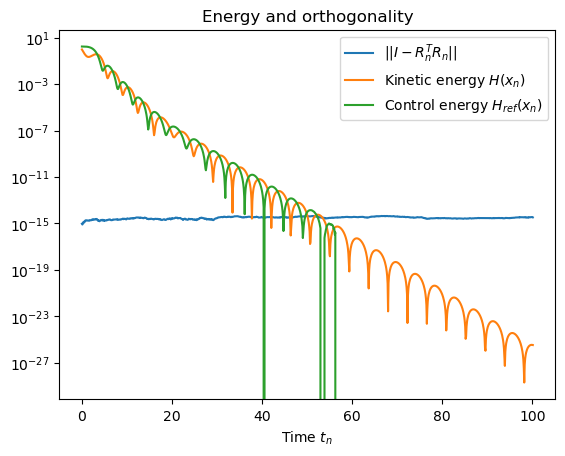

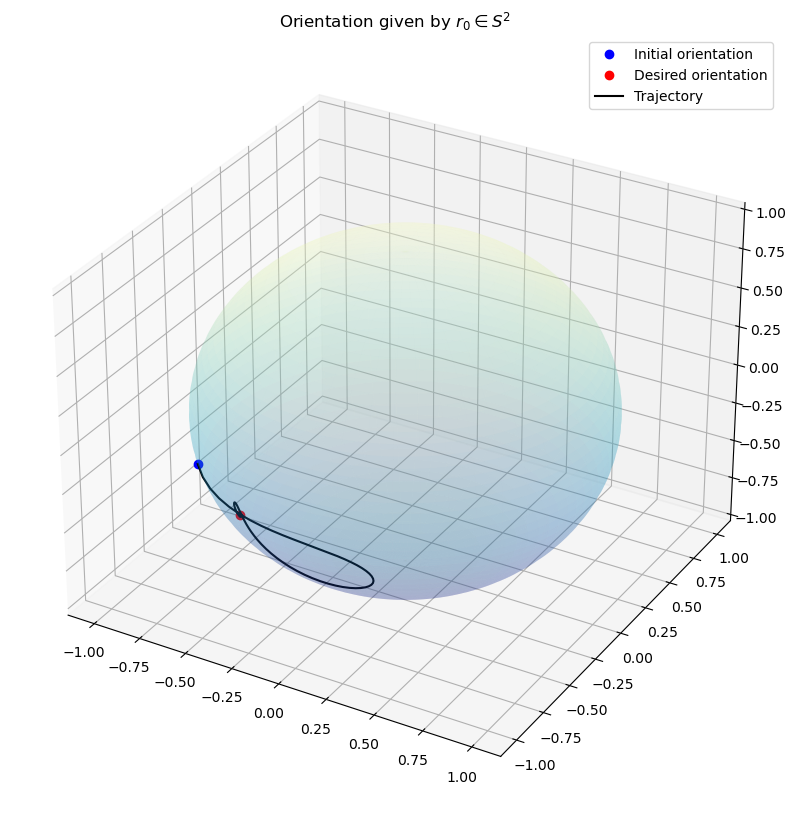

In [5]:
ws,Rs = integrate_rigid_body(w0,R0,dt,N,f_w=w_dot_es_di,f_R=R_dot,phi_w=explicit_euler,phi_R=lie_euler)
plot_discrete_energy_balance(hamiltonian_rot,yTu_mid,dt,ws,Rs)
plot_energy_orth(hamiltonian_rot,hamiltonian_ref,dt,ws,Rs)
plot_trajectory_S2(R0,Rref,Rs,i=0)

# Applying extended controller with only orientation 


In [787]:
R0 = get_orth(3,seed=2)
R00 = R0
dt = 0.1
N = 10_00
Rref = get_orth(3,seed=3)

w0 = np.array([-0.1,0.8,0.3])

Kp = np.diag([1]*3)
Kd = Kp
Kc = Kp*10

diag_I = np.array([1,0.8,1])
I = np.diag(diag_I)
I_inv = np.diag(1/diag_I)





def integrate_rigid_body_extendex(w0,R0,dt,N,f_w,f_R,phi_w,phi_R):
    """ 
    w0:     initial value angular velocity (R^3)
    R0:     initial value orientation (SO(3))
    dt:     step size in time
    N:      number of time steps
    f_w:    vector field for anngular velocity
    f_R:    vector field for orientation
    phi_w:  integrator for angular velocity
    phi_R:  integrator for orientation
    """
    Rs = [R0]
    ws = [w0]

    for n in range(N):
        R0 = Rs[-1]
        w0 = ws[-1]
        x0 = (w0,R0)
        ws.append(phi_w(x0,dt,f=f_w))
        Rs.append(phi_R(x0,dt,f=f_R))

    Rs = np.stack(Rs)
    ws = np.stack(ws)

    return ws,Rs

In [788]:
Rs = [R0]
Rcs = [np.eye(3)]
ws = [w0]
wpos= [w0] 

u_es = lambda R: -.5*hat_inv(Kp@Rref.T@R - R.T@Rref@Kp.T)

u_pos = lambda R,Rc : -.5*hat_inv(Kc@Rc.T@R - R.T@Rc@Kc.T) + u_es(R)
Rc_dot = lambda R,Rc : -.5*hat(Kd@(hat_inv(Kc@R.T@Rc - Rc.T@R@Kc.T)))

w_dot_pos = lambda w,R,Rc : I_inv@(hat(I@w)@w + u_pos(R,Rc) )
R_dot = lambda w : hat(w) 

def fp_dg(f,w0):
    w1 = w0
    c = 0
    while np.linalg.norm(w1 - (w0 + dt*I_inv@f(w0,w1))) > 1e-10:
        #w1n = w1
        w1 = w0 + dt*I_inv@f(w0,w1)
        c+=1
    return w1


for n in range(N):
    R0 = Rs[-1]
    w0 = ws[-1]
    Rc0 = Rcs[-1]

    Rs.append(R0@rodrigues(dt*R_dot(ws[-1])))
    Rcs.append(Rc0@rodrigues(dt*Rc_dot(R0,Rc0)))

    #DGM
    def f_dg(w0,w1):
        return 0.5*hat(I@(.5*(w0+w1)))@(w0+w1) + u_pos(R0,Rc0)



    ws.append(fp_dg(f_dg,w0))
    


Rs = np.stack(Rs)
Rcs = np.stack(Rcs)
ws = np.stack(ws)


hamiltonian_ref = lambda R : .5*np.trace(Kp@(np.eye(3) - Rref.T@R))
hamiltonian_ref_c = lambda Rc,R : .5*np.trace(Kc@(np.eye(3) - Rc.T@R))
hamiltonian_rot = lambda w : 0.5*I@w.T@w

hamiltonian_dot =  lambda w,R,Rc : w.T@u_pos(R,Rc) 

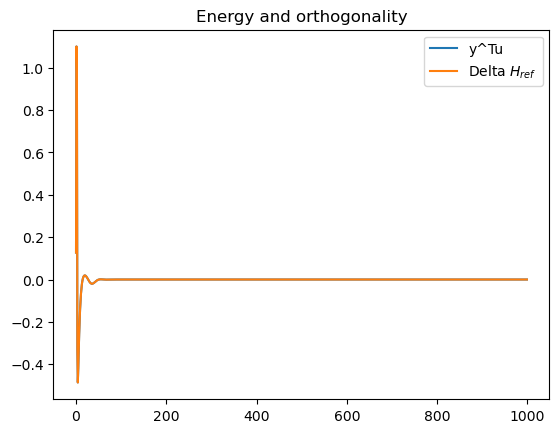

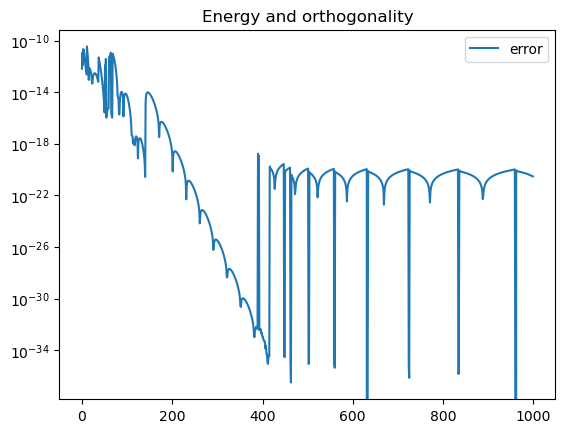

In [789]:
ytu = np.array([dt*hamiltonian_dot(.5*(w0 + w1),R0,Rc0) for w0,w1,R0,Rc0 in zip(ws[:-1],ws[1:],Rs[:-1],Rcs[:-1])])
dh = [(hamiltonian_rot(w1)-hamiltonian_rot(w0)) for w0,R0,w1,R1 in zip(ws[:-1],Rs[:-1],ws[1:],Rs[1:])]


#plt.plot([check_orth(R) for R in Rs],label="Orthogonality error for R")
#plt.plot([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
plt.plot(ytu,label="y^Tu")
#plt.semilogy([dt*hamiltonian_diss(w) for w in ws],label="H diss")
#plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
plt.plot(dh,label="Delta $H_{ref}$")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()



#plt.plot([check_orth(R) for R in Rs],label="Orthogonality error for R")
#plt.plot([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
#plt.plot(ytu,label="y^Tu")
#plt.semilogy([dt*hamiltonian_diss(w) for w in ws],label="H diss")
#plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
#plt.plot(dh,label="Delta $H_{ref}$")
#plt.legend()


plt.semilogy(np.abs(ytu - dh),label="error")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()


In [791]:
Rs = [R0]
Rcs = [np.eye(3)]
ws = [w0]
wpos= [w0] 

u_es = lambda R: -.5*hat_inv(Kp@Rref.T@R - R.T@Rref@Kp.T)

u_pos = lambda R,Rc : -.5*hat_inv(Kc@Rc.T@R - R.T@Rc@Kc.T) + u_es(R)
Rc_dot = lambda R,Rc : -.5*hat(Kd@(hat_inv(Kc@R.T@Rc - Rc.T@R@Kc.T)))

w_dot_pos = lambda w,R,Rc : I_inv@(hat(I@w)@w + u_pos(R,Rc) )
R_dot = lambda w : hat(w) 


for n in range(N):
    R0 = Rs[-1]
    w0 = ws[-1]
    Rc0 = Rcs[-1]

    Rs.append(R0@rodrigues(dt*R_dot(ws[-1])))
    Rcs.append(Rc0@rodrigues(dt*Rc_dot(R0,Rc0)))
    ws.append(w0 + dt*w_dot_pos(w0,R0,Rc0))
    


Rs = np.stack(Rs)
Rcs = np.stack(Rcs)
ws = np.stack(ws)


hamiltonian_ref = lambda R : .5*np.trace(Kp@(np.eye(3) - Rref.T@R))
hamiltonian_ref_c = lambda Rc,R : .5*np.trace(Kc@(np.eye(3) - Rc.T@R))
hamiltonian_rot = lambda w : 0.5*w.T@I_inv@w


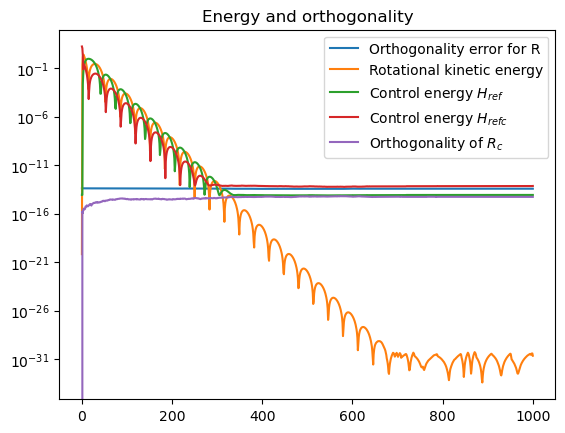

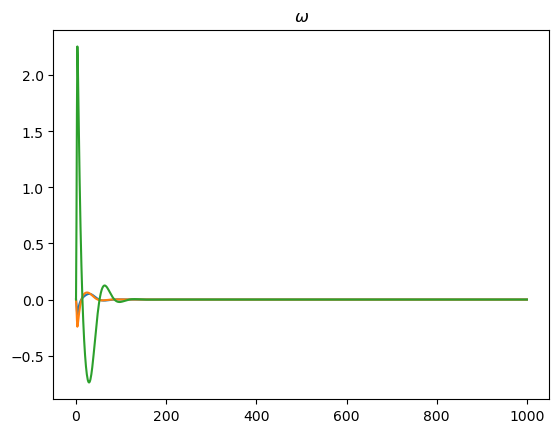

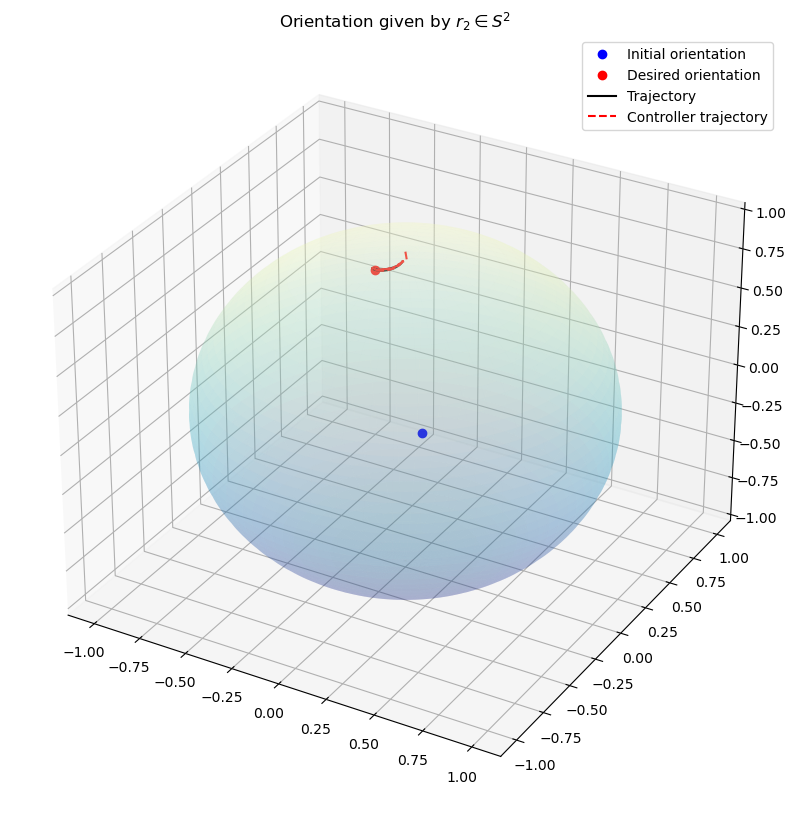

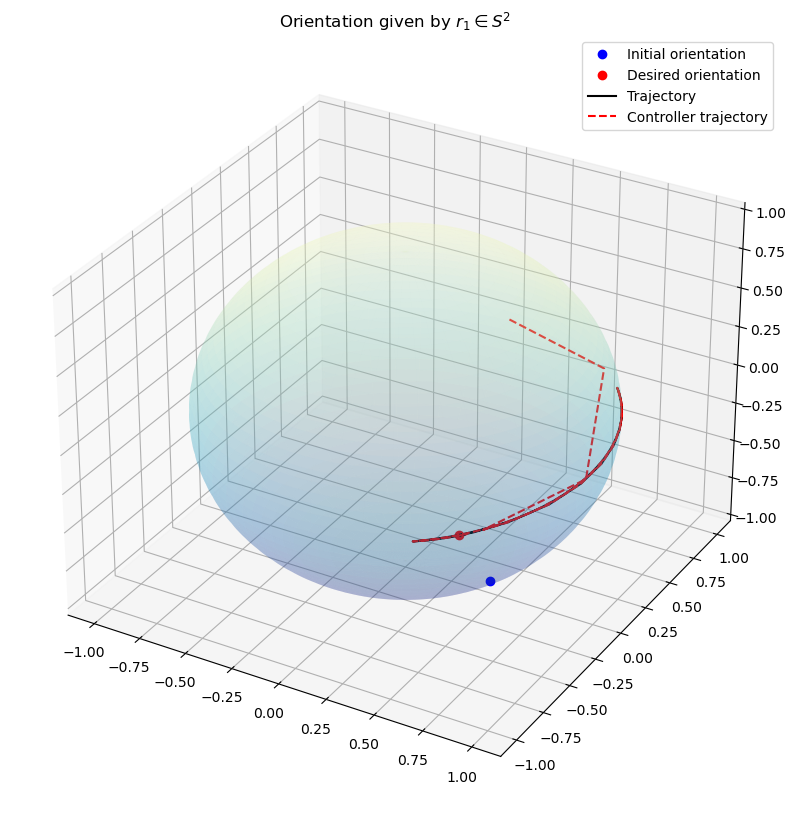

In [786]:
plt.semilogy([check_orth(R) for R in Rs],label="Orthogonality error for R")
plt.semilogy([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
plt.semilogy([hamiltonian_ref_c(Rc,R) for Rc,R in zip(Rcs,Rs)],label="Control energy $H_{refc}$")
plt.semilogy([check_orth(R) for R in Rcs],label = "Orthogonality of $R_c$")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()


plt.plot(ws)
plt.title(r"$\omega$")
plt.show()

ax = get_sphere()

i = 2
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()

ax = get_sphere()
i = 1
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()


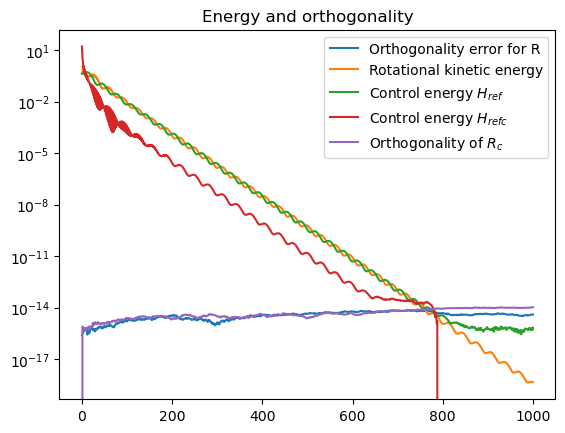

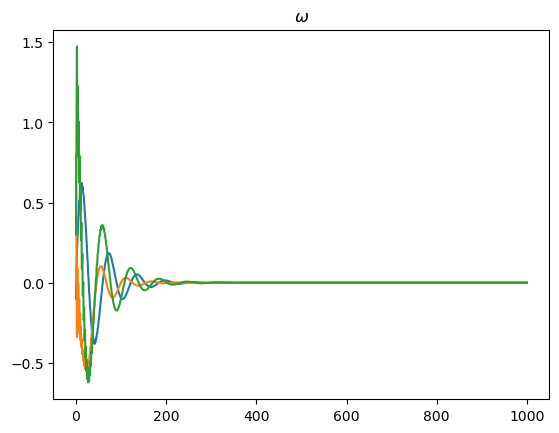

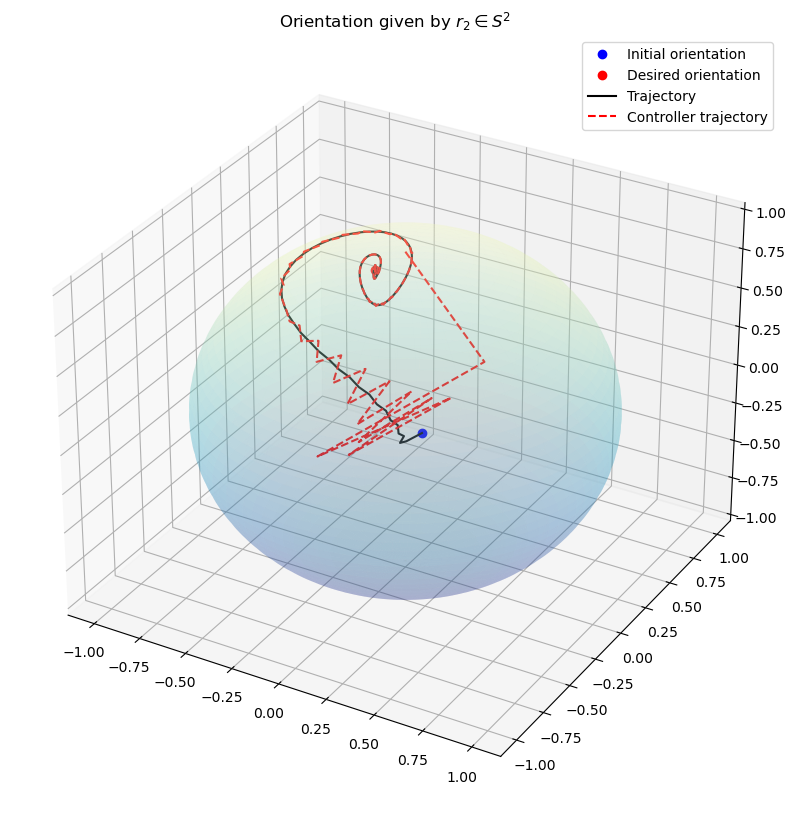

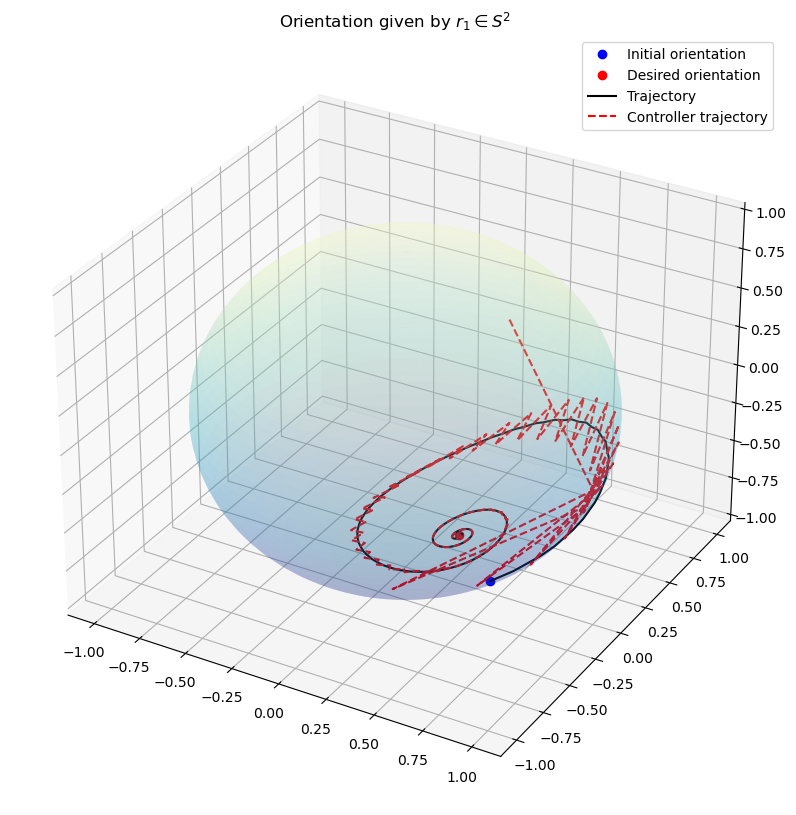

In [559]:
plt.semilogy([check_orth(R) for R in Rs],label="Orthogonality error for R")
plt.semilogy([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
plt.semilogy([hamiltonian_ref_c(Rc,R) for Rc,R in zip(Rcs,Rs)],label="Control energy $H_{refc}$")
plt.semilogy([check_orth(R) for R in Rcs],label = "Orthogonality of $R_c$")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()


plt.plot(ws)
plt.title(r"$\omega$")
plt.show()

ax = get_sphere()

i = 2
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()

ax = get_sphere()
i = 1
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()


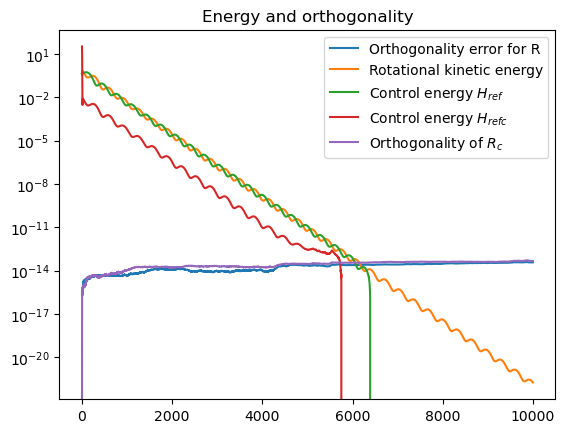

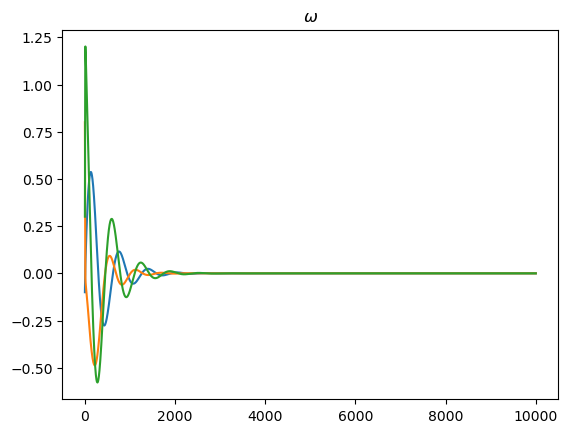

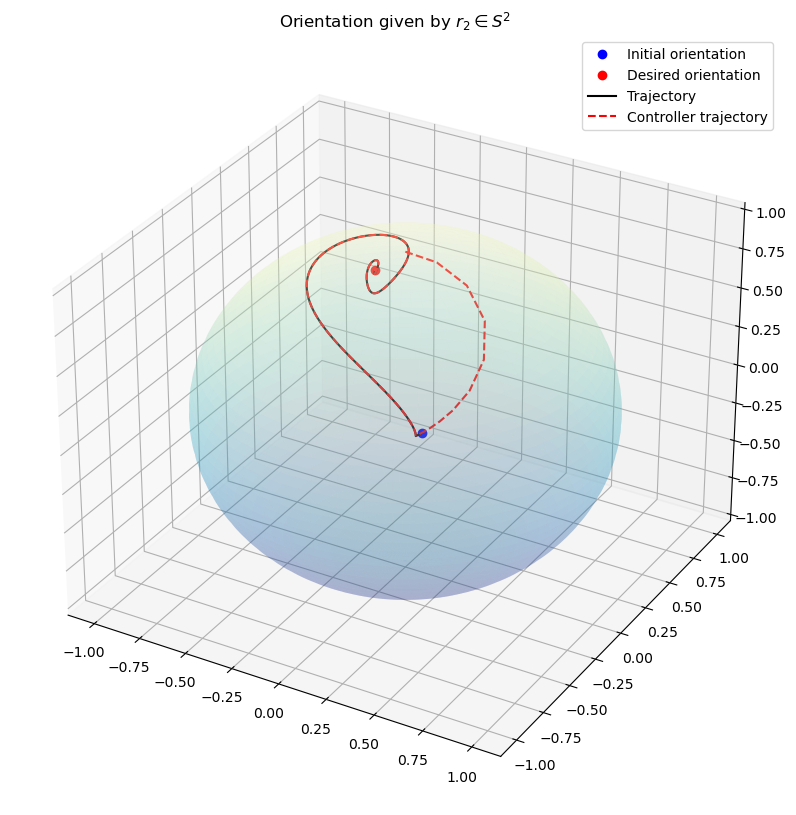

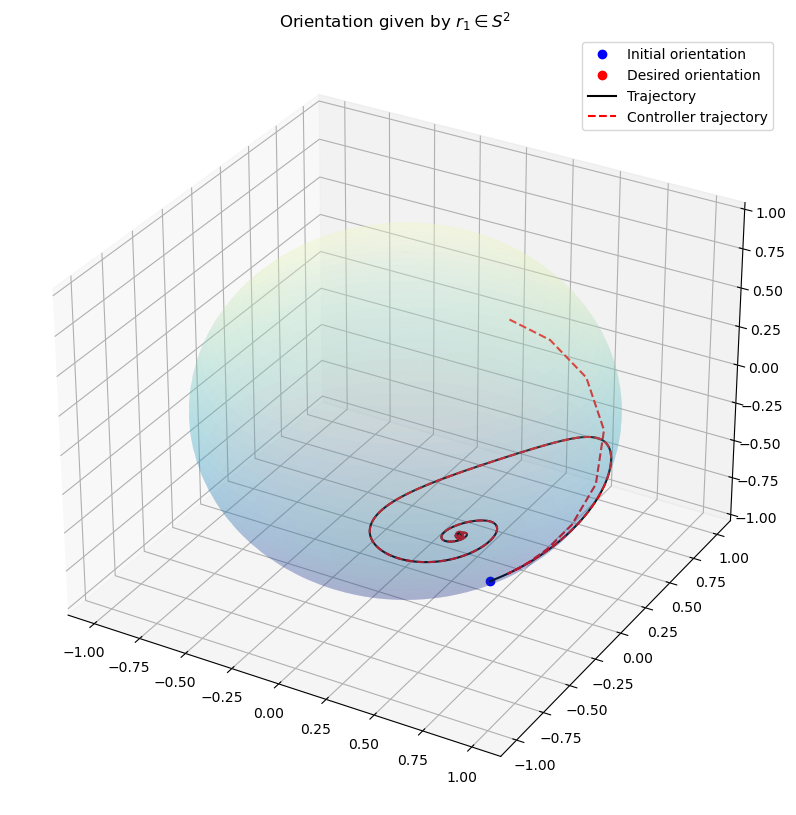

In [14]:
plt.semilogy([check_orth(R) for R in Rs],label="Orthogonality error for R")
plt.semilogy([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
plt.semilogy([hamiltonian_ref_c(Rc,R) for Rc,R in zip(Rcs,Rs)],label="Control energy $H_{refc}$")
plt.semilogy([check_orth(R) for R in Rcs],label = "Orthogonality of $R_c$")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()


plt.plot(ws)
plt.title(r"$\omega$")
plt.show()

ax = get_sphere()

i = 2
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()

ax = get_sphere()
i = 1
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()
